In [1]:
import os
import collections

import numpy as np
import matplotlib.pyplot as plt

''' Font type hack '''
'''
Link1: https://tex.stackexchange.com/questions/18687/how-to-generate-pdf-without-any-type3-fonts
Link2: http://phyletica.org/matplotlib-fonts/
'''
# plt.rcParams['text.usetex'] = True
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Arial"

# plt.rc('font',**{'family':'sans-serif','serif':['Arial']})

%config InlineBackend.figure_format = 'retina' # render double resolution plot output for Retina screens
%matplotlib inline

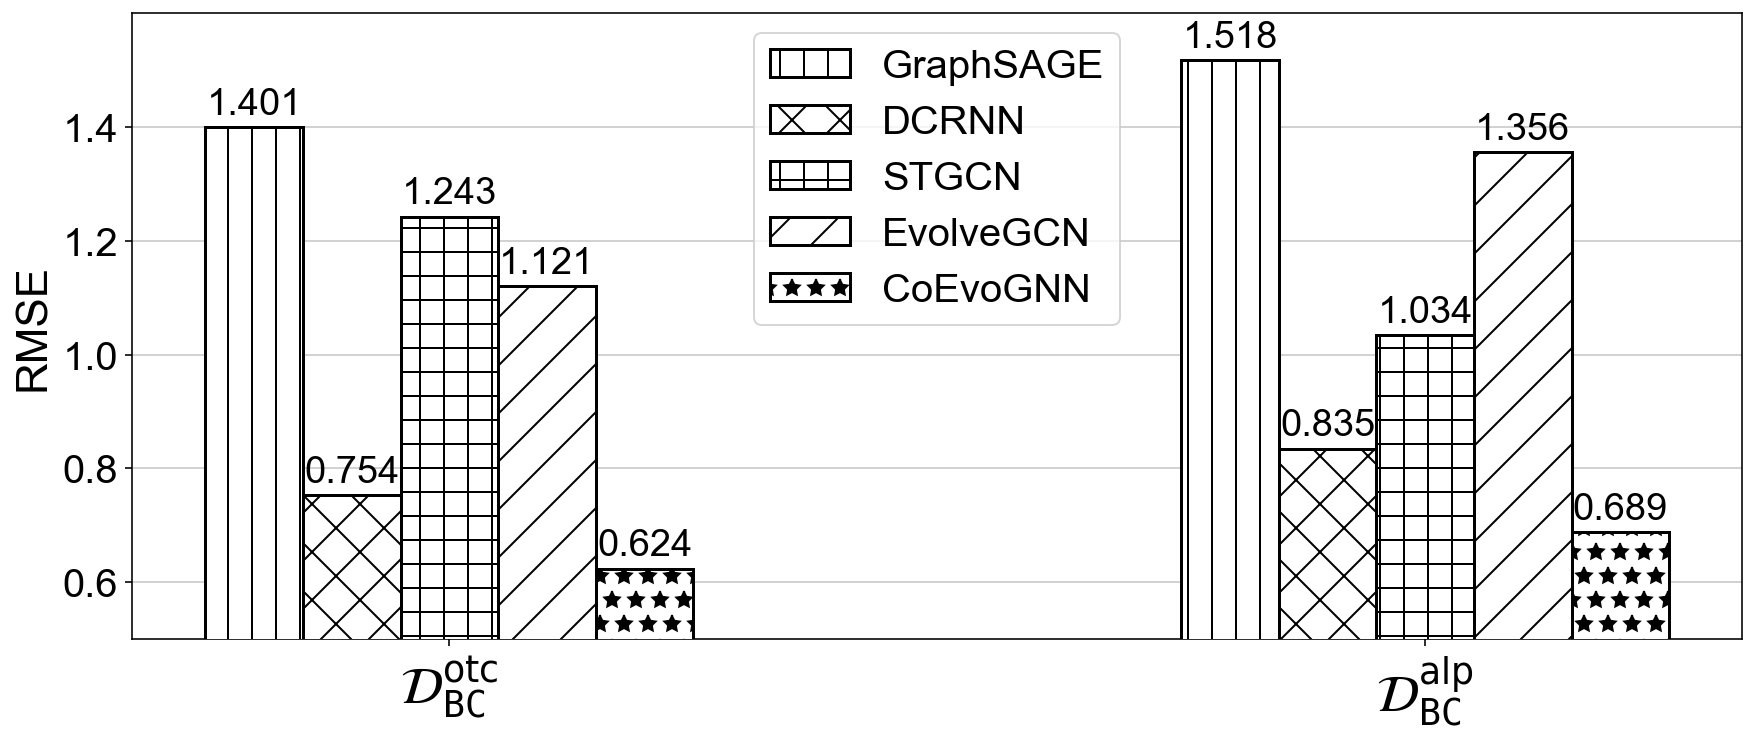

In [2]:
""" RMSE scores """
_hp = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
width = 0.1  # the width of the bars
fig, ax = plt.subplots(figsize=(12, 5))

m1 = [1.401, 1.518]
m2 = [0.754, 0.835]
m3 = [1.243, 1.034]
m4 = [1.121, 1.356]
m5 = [0.624, 0.689]

x = np.arange(1, 3)
y1, y2, y3, y4, y5 = np.array(m1), np.array(m2), np.array(m3), np.array(m4), np.array(m5)
l1, l2, l3, l4, l5 = [[f'{p:.3f}' for p in m] for m in [m1, m2, m3, m4, m5]]

bar1 = ax.bar(x + (width/2)*(-4), y1, width, zorder=3, 
              color='w', edgecolor='black', hatch=_hp[2], linewidth=1.5,
              label=r'GraphSAGE')
bar2 = ax.bar(x + (width/2)*(-2), y2, width, zorder=3, 
              color='w', edgecolor='black', hatch=_hp[5], linewidth=1.5,
              label='DCRNN')
bar3 = ax.bar(x + (width/2)*( 0), y3, width, zorder=3, 
              color='w', edgecolor='black', hatch=_hp[4], linewidth=1.5,
              label='STGCN')
bar4 = ax.bar(x + (width/2)*( 2), y4, width, zorder=3, 
              color='w', edgecolor='black', hatch=_hp[0], linewidth=1.5,
              label='EvolveGCN')
bar5 = ax.bar(x + (width/2)*( 4), y5, width, zorder=3, 
              color='w', edgecolor='black', hatch=_hp[-1], linewidth=1.5,
              label='CoEvoGNN')

def autolabel(rects, labels, _x_offset=0):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate(labels[i],
                    xy=(rect.get_x() + rect.get_width() / 2 + _x_offset, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=19)

autolabel(bar1, l1)
autolabel(bar2, l2)
autolabel(bar3, l3)
autolabel(bar4, l4)
autolabel(bar5, l5)

ax.xaxis.set_ticks(list(range(1, 3, 1)))
ax.set_xticklabels([r'$\mathcal{D}_{\mathtt{BC}}^{\mathrm{otc}}$', r'$\mathcal{D}_{\mathtt{BC}}^{\mathrm{alp}}$'])

ax.set_ylim(0.5, 1.6)
ax.yaxis.set_ticks(np.arange(0.6, 1.6, 0.2))
# ax.set_yticklabels(['10','20', '30', '40',])

ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=26)
ax.grid(axis='y', which='both', zorder=0, alpha=0.7)

# ax.set_xlabel(r'Interval $\Delta$ (month)', fontsize=24)
ax.set_ylabel(r'RMSE', fontsize=22)
ax.legend(fontsize=20, loc='upper center')

fig.tight_layout(pad=0, h_pad=0, w_pad=0)
fig.savefig(os.path.join('.', 'performance-bc-1.png'), bbox_inches='tight', dpi=200)

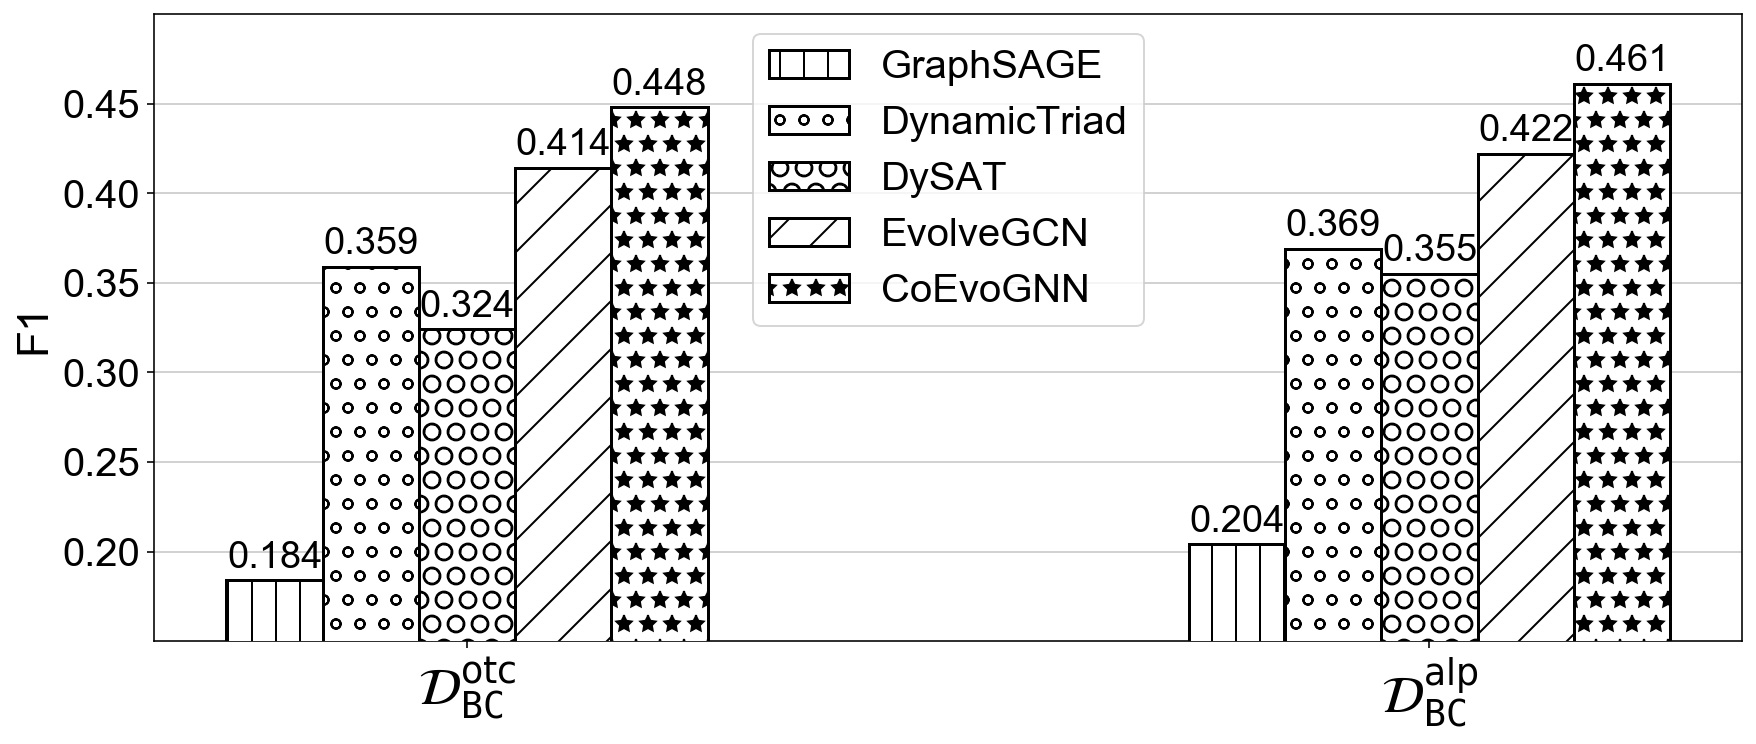

In [3]:
""" F1 scores """
fig, ax = plt.subplots(figsize=(12, 5))
m1 = [0.184, 0.204]
m2 = [0.359, 0.369]
m3 = [0.324, 0.355]
m4 = [0.414, 0.422]
m5 = [0.448, 0.461]

x = np.arange(1, 3)
y1, y2, y3, y4, y5 = np.array(m1), np.array(m2), np.array(m3), np.array(m4), np.array(m5)
l1, l2, l3, l4, l5 = [[f'{p:.3f}' for p in m] for m in [m1, m2, m3, m4, m5]]


_hp = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
width = 0.1  # the width of the bars
bar1 = ax.bar(x + (width/2)*(-4), y1, width, zorder=3, 
              color='w', edgecolor='black', hatch=_hp[2], linewidth=1.5,
              label=r'GraphSAGE')
bar2 = ax.bar(x + (width/2)*(-2), y2, width, zorder=3, 
              color='w', edgecolor='black', hatch=_hp[6], linewidth=1.5,
              label='DynamicTriad')
bar3 = ax.bar(x + (width/2)*( 0), y3, width, zorder=3, 
              color='w', edgecolor='black', hatch=_hp[7], linewidth=1.5,
              label='DySAT')
bar4 = ax.bar(x + (width/2)*( 2), y4, width, zorder=3, 
              color='w', edgecolor='black', hatch=_hp[0], linewidth=1.5,
              label='EvolveGCN')
bar5 = ax.bar(x + (width/2)*( 4), y5, width, zorder=3, 
              color='w', edgecolor='black', hatch=_hp[-1], linewidth=1.5,
              label='CoEvoGNN')

def autolabel(rects, labels, _x_offset=0):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate(labels[i],
                    xy=(rect.get_x() + rect.get_width() / 2 + _x_offset, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=19)

autolabel(bar1, l1)
autolabel(bar2, l2)
autolabel(bar3, l3)
autolabel(bar4, l4)
autolabel(bar5, l5)

ax.xaxis.set_ticks(list(range(1, 3, 1)))
ax.set_xticklabels([r'$\mathcal{D}_{\mathtt{BC}}^{\mathrm{otc}}$', r'$\mathcal{D}_{\mathtt{BC}}^{\mathrm{alp}}$'])

ax.set_ylim(0.15, 0.5)
ax.yaxis.set_ticks(np.arange(0.2, 0.5, 0.05))
# ax.set_yticklabels(['10','20', '30', '40',])

ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=26)
ax.grid(axis='y', which='both', zorder=0, alpha=0.7)

# ax.set_xlabel(r'', fontsize=24)
ax.set_ylabel(r'F1', fontsize=22)
ax.legend(fontsize=20, loc='upper center')

fig.tight_layout(pad=0, h_pad=0, w_pad=0)
fig.savefig(os.path.join('.', 'performance-bc-2.png'), bbox_inches='tight', dpi=200)